In [1]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

2023-10-01 10:26:38.900890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# dataset_path = "data/training/"

In [3]:
# header = 'filename'
# for i in range(1, 41):
#   header += f' mfcc{i}'
# header += ' label'
# header = header.split()

In [4]:
# file = open('data_1.csv', 'w', newline='')
# with file:
#   writer = csv.writer(file)
#   writer.writerow(header)

# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#           semantic_label = dirpath.split("/")[-1]
#           print("\nProcessing: {}".format(semantic_label))
#           for f in filenames:
#               file_path = os.path.join(dirpath, f)
#               to_append = f'{file_path}'
#               # print(file_path)
#               y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#               mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#               for e in mfcc:
#                   to_append += f' {np.mean(e.T, axis=0)}'
#               to_append += f' {semantic_label}'
#               file = open('data_1.csv', 'a', newline='')
#               with file:
#                   writer = csv.writer(file)
#                   writer.writerow(to_append.split())

In [5]:
# data = pd.read_csv('../data_mfccRMScqt.csv')
data = pd.read_csv('../Preprocessing/db5/data_mfccDWTcqtdb5L1.csv')
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT/MR/New_MR_013.wav,-495.158142,-17.699718,1.995417,-6.560966,-0.151382,4.404518,-3.197990,1.378374,-0.059363,...,0.000343,0.000522,0.000572,0.000530,0.000578,0.000603,0.000621,0.000530,0.000486,MR
1,../data/DWT/MR/New_MR_174.wav,-548.711731,-35.574787,12.506323,-3.259351,1.374236,1.946338,-2.657305,1.942204,-0.956127,...,0.000278,0.000360,0.000325,0.000276,0.000352,0.000282,0.000268,0.000338,0.000349,MR
2,../data/DWT/MR/New_MR_182.wav,-551.774353,-34.949604,14.678288,-2.625841,-3.152858,-3.667840,1.138761,1.216005,-2.939780,...,0.000313,0.000400,0.000332,0.000252,0.000278,0.000266,0.000260,0.000282,0.000211,MR
3,../data/DWT/MR/New_MR_005.wav,-484.838928,-17.331890,0.794573,-6.355471,0.096363,5.741897,1.160718,2.086056,0.705592,...,0.000467,0.000522,0.000531,0.000648,0.000765,0.000556,0.000651,0.000867,0.000646,MR
4,../data/DWT/MR/New_MR_067.wav,-543.766052,-36.516781,12.567668,-2.045451,2.803391,3.578267,-2.691306,2.837240,1.323356,...,0.000254,0.000236,0.000313,0.000332,0.000355,0.000361,0.000309,0.000317,0.000343,MR


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 103 entries, filename to label
dtypes: float64(101), object(2)
memory usage: 804.8+ KB


In [7]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [8]:
X.shape

(1000, 101)

In [9]:
y.head()

0    MR
1    MR
2    MR
3    MR
4    MR
Name: label, dtype: object

In [10]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-495.158142,-17.699718,1.995417,-6.560966,-0.151382,4.404518,-3.197990,1.378374,-0.059363,-1.130225,...,0.000473,0.000343,0.000522,0.000572,0.000530,0.000578,0.000603,0.000621,0.000530,0.000486
1,-548.711731,-35.574787,12.506323,-3.259351,1.374236,1.946338,-2.657305,1.942204,-0.956127,-2.049379,...,0.000290,0.000278,0.000360,0.000325,0.000276,0.000352,0.000282,0.000268,0.000338,0.000349
2,-551.774353,-34.949604,14.678288,-2.625841,-3.152858,-3.667840,1.138761,1.216005,-2.939780,0.393365,...,0.000180,0.000313,0.000400,0.000332,0.000252,0.000278,0.000266,0.000260,0.000282,0.000211
3,-484.838928,-17.331890,0.794573,-6.355471,0.096363,5.741897,1.160718,2.086056,0.705592,-0.802245,...,0.000580,0.000467,0.000522,0.000531,0.000648,0.000765,0.000556,0.000651,0.000867,0.000646
4,-543.766052,-36.516781,12.567668,-2.045451,2.803391,3.578267,-2.691306,2.837240,1.323356,1.769056,...,0.000237,0.000254,0.000236,0.000313,0.000332,0.000355,0.000361,0.000309,0.000317,0.000343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-405.726990,-77.300079,13.942502,4.767124,-1.656976,-2.802324,0.184631,2.351334,-2.018372,4.045334,...,0.000747,0.000729,0.000598,0.000523,0.000645,0.000703,0.000661,0.000784,0.000714,0.000734
996,-388.875153,-78.687134,14.147832,3.051652,-1.846769,-0.447980,2.758378,-0.398919,-3.622700,1.690781,...,0.000820,0.000976,0.001012,0.001132,0.001267,0.001487,0.001432,0.001562,0.001584,0.001305
997,-535.572510,-37.654732,11.200865,-0.888963,-0.640530,2.987886,0.732820,2.676649,-2.635229,-1.924914,...,0.000215,0.000201,0.000223,0.000249,0.000249,0.000231,0.000196,0.000271,0.000256,0.000222
998,-507.304382,-28.481316,10.688545,0.405298,-1.481764,5.094982,0.307274,0.223016,-0.549139,-2.330604,...,0.000251,0.000317,0.000314,0.000221,0.000288,0.000378,0.000398,0.000361,0.000272,0.000316


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
y_test.shape

(200,)

In [13]:
X_train.shape

(800, 101)

In [14]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
29,-571.000305,-44.529331,8.557463,-5.354973,-0.444946,0.775353,-3.911644,-0.161377,-0.040204,-0.763672,...,0.000156,0.000183,0.000165,0.000170,0.000233,0.000188,0.000118,0.000173,0.000226,0.000225
535,-546.471436,-21.875593,7.981214,-1.554237,-2.442505,-0.280991,3.010110,-1.707507,-0.782117,-4.404325,...,0.000182,0.000162,0.000160,0.000179,0.000178,0.000173,0.000203,0.000208,0.000116,0.000134
695,-483.048645,-35.087589,3.334061,0.057829,-2.300550,-0.083517,-2.038794,2.419527,-1.354680,-1.581535,...,0.000549,0.000583,0.000651,0.000712,0.000808,0.000555,0.000406,0.000411,0.000455,0.000639
557,-612.470886,-26.888533,13.136589,-3.096690,-0.632893,-0.204262,1.073217,0.608695,2.258817,0.773053,...,0.000137,0.000124,0.000122,0.000114,0.000074,0.000058,0.000074,0.000087,0.000041,0.000102
836,-488.692200,-40.434914,18.709089,-5.685947,-0.671774,-0.475641,-1.842119,1.419811,-0.200171,-0.360520,...,0.000283,0.000252,0.000250,0.000239,0.000267,0.000296,0.000285,0.000274,0.000279,0.000314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-555.877991,-42.176857,14.207497,-4.525305,0.835319,0.281500,-3.061442,-0.741886,-1.151715,-0.392564,...,0.000222,0.000188,0.000213,0.000206,0.000192,0.000231,0.000227,0.000215,0.000203,0.000256
270,-609.207642,-11.152511,1.870600,-3.416370,1.308998,3.316016,-1.200858,1.639898,-0.514021,-0.540516,...,0.000178,0.000236,0.000217,0.000155,0.000210,0.000136,0.000154,0.000218,0.000222,0.000213
860,-606.614502,-17.670940,8.634387,-5.587108,-0.084813,1.902464,1.920007,5.127586,-2.719897,0.581622,...,0.000146,0.000114,0.000184,0.000157,0.000191,0.000217,0.000161,0.000141,0.000162,0.000155
435,-533.061646,-29.820217,4.227546,1.623833,-1.713859,-4.619459,3.864091,-0.920375,1.959889,-1.475473,...,0.000248,0.000259,0.000216,0.000263,0.000339,0.000338,0.000261,0.000196,0.000220,0.000175


In [15]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(200,)
(800, 101, 1)
(200, 101, 1)


In [16]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [17]:
X_train.shape[1], X_train.shape[2]

(101, 1)

In [18]:
def build_model(dropout_rate=0):
    model = models.Sequential(
        [
            tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
            tf.keras.layers.Dense(32,activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            tf.keras.layers.LSTM(64, return_sequences=False),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(32, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            tf.keras.layers.Dense(16, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(5, activation='softmax')
        ]
    )
    # optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [19]:
model = build_model()
model.summary()

2023-10-01 10:26:40.544370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 10:26:40.545608: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 101, 64)           16896     
                                                                 
 dense (Dense)               (None, 101, 32)           2080      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                5

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

modeltuning=KerasClassifier(build_fn=build_model)

params={
        'batch_size': [16, 32, 64],
        'epochs':[10],
        }
gs=GridSearchCV(estimator=modeltuning, param_grid=params, cv=10, verbose=1, scoring='balanced_accuracy')
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X, y, validation_data=(X_test, y_test))

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/tmp/ipykernel_94217/1532594248.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modeltuning=KerasClassifier(build_fn=build_model)


Epoch 1/10
57/57 [==============================] - 15s 193ms/step - loss: 1.6085 - accuracy: 0.2011 - val_loss: 1.6071 - val_accuracy: 0.1900
Epoch 2/10
57/57 [==============================] - 14s 242ms/step - loss: 1.5976 - accuracy: 0.2100 - val_loss: 1.6061 - val_accuracy: 0.1850
Epoch 3/10
57/57 [==============================] - 10s 177ms/step - loss: 1.5894 - accuracy: 0.2256 - val_loss: 1.6080 - val_accuracy: 0.2400
Epoch 4/10
57/57 [==============================] - 9s 162ms/step - loss: 1.5852 - accuracy: 0.2300 - val_loss: 1.6105 - val_accuracy: 0.1900
Epoch 5/10
57/57 [==============================] - 9s 149ms/step - loss: 1.5912 - accuracy: 0.2322 - val_loss: 1.6087 - val_accuracy: 0.1900
Epoch 6/10
57/57 [==============================] - 8s 144ms/step - loss: 1.5874 - accuracy: 0.2267 - val_loss: 1.6166 - val_accuracy: 0.1850
Epoch 7/10
57/57 [==============================] - 9s 156ms/step - loss: 1.5886 - accuracy: 0.2178 - val_loss: 1.6185 - val_accuracy: 0.1900
Epo

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
57/57 [==============================] - 13s 163ms/step - loss: 1.6056 - accuracy: 0.2056 - val_loss: 1.6054 - val_accuracy: 0.2200
Epoch 2/10
57/57 [==============================] - 8s 148ms/step - loss: 1.6077 - accuracy: 0.1956 - val_loss: 1.6052 - val_accuracy: 0.2200
Epoch 3/10
57/57 [==============================] - 9s 154ms/step - loss: 1.5905 - accuracy: 0.2411 - val_loss: 1.6049 - val_accuracy: 0.2400
Epoch 4/10
57/57 [==============================] - 8s 144ms/step - loss: 1.5856 - accuracy: 0.2311 - val_loss: 1.6099 - val_accuracy: 0.2200
Epoch 5/10
57/57 [==============================] - 9s 155ms/step - loss: 1.5855 - accuracy: 0.2233 - val_loss: 1.6117 - val_accuracy: 0.2200
Epoch 6/10
57/57 [==============================] - 9s 161ms/step - loss: 1.5830 - accuracy: 0.2344 - val_loss: 1.6088 - val_accuracy: 0.2400
Epoch 7/10
57/57 [==============================] - 9s 161ms/step - loss: 1.5848 - accuracy: 0.2222 - val_loss: 1.6141 - val_accuracy: 0.2200
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
57/57 [==============================] - 13s 159ms/step - loss: 1.6055 - accuracy: 0.2344 - val_loss: 1.6181 - val_accuracy: 0.2200
Epoch 2/10
57/57 [==============================] - 9s 151ms/step - loss: 1.5978 - accuracy: 0.2000 - val_loss: 1.6276 - val_accuracy: 0.2200
Epoch 3/10
57/57 [==============================] - 9s 158ms/step - loss: 1.5947 - accuracy: 0.2133 - val_loss: 1.6416 - val_accuracy: 0.2200
Epoch 4/10
57/57 [==============================] - 10s 169ms/step - loss: 1.5904 - accuracy: 0.2100 - val_loss: 1.6467 - val_accuracy: 0.1900
Epoch 5/10
57/57 [==============================] - 8s 146ms/step - loss: 1.5875 - accuracy: 0.2233 - val_loss: 1.6458 - val_accuracy: 0.2200
Epoch 6/10
57/57 [==============================] - 9s 150ms/step - loss: 1.5844 - accuracy: 0.2233 - val_loss: 1.6518 - val_accuracy: 0.2200
Epoch 7/10
57/57 [==============================] - 9s 156ms/step - loss: 1.5824 - accuracy: 0.2133 - val_loss: 1.6548 - val_accuracy: 0.1650
Epoc

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
57/57 [==============================] - 12s 146ms/step - loss: 1.6093 - accuracy: 0.2200 - val_loss: 1.6214 - val_accuracy: 0.1850
Epoch 2/10
57/57 [==============================] - 8s 147ms/step - loss: 1.5949 - accuracy: 0.2400 - val_loss: 1.6285 - val_accuracy: 0.1850
Epoch 3/10
57/57 [==============================] - 9s 154ms/step - loss: 1.5890 - accuracy: 0.2478 - val_loss: 1.6340 - val_accuracy: 0.2200
Epoch 4/10
57/57 [==============================] - 9s 165ms/step - loss: 1.5914 - accuracy: 0.2211 - val_loss: 1.6424 - val_accuracy: 0.1900
Epoch 5/10
57/57 [==============================] - 9s 164ms/step - loss: 1.5871 - accuracy: 0.2300 - val_loss: 1.6501 - val_accuracy: 0.1900
Epoch 6/10
57/57 [==============================] - 9s 159ms/step - loss: 1.5854 - accuracy: 0.2278 - val_loss: 1.6581 - val_accuracy: 0.1900
Epoch 7/10
57/57 [==============================] - 9s 160ms/step - loss: 1.5859 - accuracy: 0.2144 - val_loss: 1.6678 - val_accuracy: 0.1650
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
57/57 [==============================] - 13s 167ms/step - loss: 1.6126 - accuracy: 0.2022 - val_loss: 1.6103 - val_accuracy: 0.2200
Epoch 2/10
57/57 [==============================] - 8s 147ms/step - loss: 1.6045 - accuracy: 0.2133 - val_loss: 1.6162 - val_accuracy: 0.1650
Epoch 3/10
57/57 [==============================] - 9s 159ms/step - loss: 1.5941 - accuracy: 0.2322 - val_loss: 1.6181 - val_accuracy: 0.1650
Epoch 4/10
57/57 [==============================] - 10s 168ms/step - loss: 1.5877 - accuracy: 0.2111 - val_loss: 1.6199 - val_accuracy: 0.1650
Epoch 5/10
57/57 [==============================] - 9s 159ms/step - loss: 1.5855 - accuracy: 0.2222 - val_loss: 1.6227 - val_accuracy: 0.1650
Epoch 6/10
57/57 [==============================] - 9s 152ms/step - loss: 1.5874 - accuracy: 0.2267 - val_loss: 1.6270 - val_accuracy: 0.1650
Epoch 7/10
57/57 [==============================] - 9s 164ms/step - loss: 1.5823 - accuracy: 0.2400 - val_loss: 1.6270 - val_accuracy: 0.1650
Epoc

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
57/57 [==============================] - 13s 162ms/step - loss: 1.6104 - accuracy: 0.1956 - val_loss: 1.6122 - val_accuracy: 0.1900
Epoch 2/10
57/57 [==============================] - 8s 146ms/step - loss: 1.5971 - accuracy: 0.2322 - val_loss: 1.6117 - val_accuracy: 0.2200
Epoch 3/10
57/57 [==============================] - 9s 161ms/step - loss: 1.5951 - accuracy: 0.2167 - val_loss: 1.6153 - val_accuracy: 0.2200
Epoch 4/10
57/57 [==============================] - 9s 159ms/step - loss: 1.5946 - accuracy: 0.1889 - val_loss: 1.6169 - val_accuracy: 0.1900
Epoch 5/10
57/57 [==============================] - 9s 153ms/step - loss: 1.5855 - accuracy: 0.2244 - val_loss: 1.6159 - val_accuracy: 0.2200
Epoch 6/10
57/57 [==============================] - 9s 152ms/step - loss: 1.5898 - accuracy: 0.2322 - val_loss: 1.6247 - val_accuracy: 0.1900
Epoch 7/10
57/57 [==============================] - 8s 136ms/step - loss: 1.5876 - accuracy: 0.2000 - val_loss: 1.6256 - val_accuracy: 0.2200
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
57/57 [==============================] - 13s 163ms/step - loss: 1.6097 - accuracy: 0.2167 - val_loss: 1.6098 - val_accuracy: 0.2400
Epoch 2/10
57/57 [==============================] - 9s 152ms/step - loss: 1.5992 - accuracy: 0.2122 - val_loss: 1.6128 - val_accuracy: 0.2400
Epoch 3/10
57/57 [==============================] - 8s 149ms/step - loss: 1.5940 - accuracy: 0.2167 - val_loss: 1.6153 - val_accuracy: 0.2400
Epoch 4/10
57/57 [==============================] - 9s 159ms/step - loss: 1.5860 - accuracy: 0.2378 - val_loss: 1.6140 - val_accuracy: 0.2400
Epoch 5/10
57/57 [==============================] - 9s 160ms/step - loss: 1.5880 - accuracy: 0.2344 - val_loss: 1.6218 - val_accuracy: 0.2200
Epoch 6/10
57/57 [==============================] - 9s 157ms/step - loss: 1.5838 - accuracy: 0.2233 - val_loss: 1.6269 - val_accuracy: 0.2200
Epoch 7/10
57/57 [==============================] - 9s 154ms/step - loss: 1.5871 - accuracy: 0.2244 - val_loss: 1.6301 - val_accuracy: 0.2400
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
57/57 [==============================] - 11s 140ms/step - loss: 1.6117 - accuracy: 0.1711 - val_loss: 1.6117 - val_accuracy: 0.1650
Epoch 2/10
57/57 [==============================] - 8s 137ms/step - loss: 1.5948 - accuracy: 0.2133 - val_loss: 1.6155 - val_accuracy: 0.1650
Epoch 3/10
57/57 [==============================] - 9s 160ms/step - loss: 1.5926 - accuracy: 0.2011 - val_loss: 1.6180 - val_accuracy: 0.1650
Epoch 4/10
57/57 [==============================] - 8s 149ms/step - loss: 1.5888 - accuracy: 0.2056 - val_loss: 1.6216 - val_accuracy: 0.1850
Epoch 5/10
57/57 [==============================] - 8s 148ms/step - loss: 1.5848 - accuracy: 0.2000 - val_loss: 1.6284 - val_accuracy: 0.1650
Epoch 6/10
57/57 [==============================] - 9s 159ms/step - loss: 1.5877 - accuracy: 0.2344 - val_loss: 1.6293 - val_accuracy: 0.2200
Epoch 7/10
57/57 [==============================] - 9s 155ms/step - loss: 1.5850 - accuracy: 0.2111 - val_loss: 1.6404 - val_accuracy: 0.1650
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
57/57 [==============================] - 12s 150ms/step - loss: 1.6074 - accuracy: 0.2200 - val_loss: 1.6134 - val_accuracy: 0.1850
Epoch 2/10
57/57 [==============================] - 9s 150ms/step - loss: 1.6028 - accuracy: 0.2256 - val_loss: 1.6180 - val_accuracy: 0.2400
Epoch 3/10
57/57 [==============================] - 9s 151ms/step - loss: 1.5948 - accuracy: 0.2178 - val_loss: 1.6251 - val_accuracy: 0.2400
Epoch 4/10
57/57 [==============================] - 9s 157ms/step - loss: 1.5901 - accuracy: 0.2044 - val_loss: 1.6292 - val_accuracy: 0.2400
Epoch 5/10
57/57 [==============================] - 9s 155ms/step - loss: 1.5845 - accuracy: 0.2189 - val_loss: 1.6372 - val_accuracy: 0.2400
Epoch 6/10
57/57 [==============================] - 9s 155ms/step - loss: 1.5850 - accuracy: 0.2278 - val_loss: 1.6403 - val_accuracy: 0.2400
Epoch 7/10
57/57 [==============================] - 9s 157ms/step - loss: 1.5861 - accuracy: 0.2222 - val_loss: 1.6508 - val_accuracy: 0.2400
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
57/57 [==============================] - 13s 158ms/step - loss: 1.6111 - accuracy: 0.2122 - val_loss: 1.6161 - val_accuracy: 0.1850
Epoch 2/10
57/57 [==============================] - 8s 149ms/step - loss: 1.6070 - accuracy: 0.1933 - val_loss: 1.6203 - val_accuracy: 0.1850
Epoch 3/10
57/57 [==============================] - 9s 156ms/step - loss: 1.5936 - accuracy: 0.2011 - val_loss: 1.6275 - val_accuracy: 0.1850
Epoch 4/10
57/57 [==============================] - 9s 164ms/step - loss: 1.5939 - accuracy: 0.2144 - val_loss: 1.6383 - val_accuracy: 0.1650
Epoch 5/10
57/57 [==============================] - 9s 160ms/step - loss: 1.5910 - accuracy: 0.2222 - val_loss: 1.6338 - val_accuracy: 0.1650
Epoch 6/10
57/57 [==============================] - 9s 157ms/step - loss: 1.5875 - accuracy: 0.2144 - val_loss: 1.6405 - val_accuracy: 0.1900
Epoch 7/10
57/57 [==============================] - 9s 155ms/step - loss: 1.5859 - accuracy: 0.2156 - val_loss: 1.6494 - val_accuracy: 0.2400
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
29/29 [==============================] - 9s 200ms/step - loss: 1.6117 - accuracy: 0.2078 - val_loss: 1.6072 - val_accuracy: 0.1900
Epoch 2/10
29/29 [==============================] - 5s 162ms/step - loss: 1.6057 - accuracy: 0.2022 - val_loss: 1.6049 - val_accuracy: 0.2400
Epoch 3/10
29/29 [==============================] - 5s 155ms/step - loss: 1.5953 - accuracy: 0.2333 - val_loss: 1.6041 - val_accuracy: 0.2200
Epoch 4/10
29/29 [==============================] - 5s 185ms/step - loss: 1.5906 - accuracy: 0.2211 - val_loss: 1.6058 - val_accuracy: 0.2400
Epoch 5/10
29/29 [==============================] - 5s 179ms/step - loss: 1.5933 - accuracy: 0.2189 - val_loss: 1.6066 - val_accuracy: 0.2400
Epoch 6/10
29/29 [==============================] - 5s 180ms/step - loss: 1.5856 - accuracy: 0.2278 - val_loss: 1.6082 - val_accuracy: 0.2400
Epoch 7/10
29/29 [==============================] - 5s 180ms/step - loss: 1.5881 - accuracy: 0.2156 - val_loss: 1.6093 - val_accuracy: 0.2400
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
29/29 [==============================] - 9s 196ms/step - loss: 1.6066 - accuracy: 0.2200 - val_loss: 1.6094 - val_accuracy: 0.1900
Epoch 2/10
29/29 [==============================] - 5s 177ms/step - loss: 1.6012 - accuracy: 0.2278 - val_loss: 1.6075 - val_accuracy: 0.1900
Epoch 3/10
29/29 [==============================] - 5s 172ms/step - loss: 1.5970 - accuracy: 0.2344 - val_loss: 1.6073 - val_accuracy: 0.1900
Epoch 4/10
29/29 [==============================] - 5s 185ms/step - loss: 1.5918 - accuracy: 0.2111 - val_loss: 1.6084 - val_accuracy: 0.1900
Epoch 5/10
29/29 [==============================] - 5s 173ms/step - loss: 1.5912 - accuracy: 0.1900 - val_loss: 1.6081 - val_accuracy: 0.1900
Epoch 6/10
29/29 [==============================] - 5s 182ms/step - loss: 1.5932 - accuracy: 0.2167 - val_loss: 1.6099 - val_accuracy: 0.1900
Epoch 7/10
29/29 [==============================] - 6s 218ms/step - loss: 1.5890 - accuracy: 0.2067 - val_loss: 1.6124 - val_accuracy: 0.1900
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
29/29 [==============================] - 10s 216ms/step - loss: 1.6112 - accuracy: 0.2089 - val_loss: 1.6179 - val_accuracy: 0.1650
Epoch 2/10
29/29 [==============================] - 6s 200ms/step - loss: 1.6034 - accuracy: 0.2100 - val_loss: 1.6250 - val_accuracy: 0.1900
Epoch 3/10
29/29 [==============================] - 6s 207ms/step - loss: 1.5948 - accuracy: 0.2178 - val_loss: 1.6321 - val_accuracy: 0.1850
Epoch 4/10
29/29 [==============================] - 6s 214ms/step - loss: 1.5883 - accuracy: 0.2256 - val_loss: 1.6399 - val_accuracy: 0.1900
Epoch 5/10
29/29 [==============================] - 5s 185ms/step - loss: 1.5876 - accuracy: 0.2256 - val_loss: 1.6460 - val_accuracy: 0.1900
Epoch 6/10
29/29 [==============================] - 5s 158ms/step - loss: 1.5872 - accuracy: 0.2189 - val_loss: 1.6531 - val_accuracy: 0.1850
Epoch 7/10
29/29 [==============================] - 5s 167ms/step - loss: 1.5834 - accuracy: 0.2311 - val_loss: 1.6584 - val_accuracy: 0.1850
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
29/29 [==============================] - 9s 210ms/step - loss: 1.6109 - accuracy: 0.2278 - val_loss: 1.6138 - val_accuracy: 0.2200
Epoch 2/10
29/29 [==============================] - 5s 165ms/step - loss: 1.6065 - accuracy: 0.1811 - val_loss: 1.6211 - val_accuracy: 0.1650
Epoch 3/10
29/29 [==============================] - 5s 189ms/step - loss: 1.5934 - accuracy: 0.2089 - val_loss: 1.6267 - val_accuracy: 0.2200
Epoch 4/10
29/29 [==============================] - 7s 237ms/step - loss: 1.5886 - accuracy: 0.1989 - val_loss: 1.6356 - val_accuracy: 0.1850
Epoch 5/10
29/29 [==============================] - 6s 213ms/step - loss: 1.5865 - accuracy: 0.2133 - val_loss: 1.6451 - val_accuracy: 0.1650
Epoch 6/10
29/29 [==============================] - 6s 201ms/step - loss: 1.5864 - accuracy: 0.2233 - val_loss: 1.6526 - val_accuracy: 0.1650
Epoch 7/10
29/29 [==============================] - 5s 188ms/step - loss: 1.5849 - accuracy: 0.2400 - val_loss: 1.6622 - val_accuracy: 0.1650
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
29/29 [==============================] - 11s 272ms/step - loss: 1.6058 - accuracy: 0.2122 - val_loss: 1.6103 - val_accuracy: 0.1650
Epoch 2/10
29/29 [==============================] - 5s 182ms/step - loss: 1.5995 - accuracy: 0.2067 - val_loss: 1.6113 - val_accuracy: 0.1650
Epoch 3/10
29/29 [==============================] - 6s 217ms/step - loss: 1.5973 - accuracy: 0.2100 - val_loss: 1.6128 - val_accuracy: 0.2200
Epoch 4/10
29/29 [==============================] - 5s 178ms/step - loss: 1.5900 - accuracy: 0.2011 - val_loss: 1.6165 - val_accuracy: 0.1650
Epoch 5/10
29/29 [==============================] - 6s 212ms/step - loss: 1.5844 - accuracy: 0.2378 - val_loss: 1.6204 - val_accuracy: 0.1650
Epoch 6/10
29/29 [==============================] - 6s 224ms/step - loss: 1.5847 - accuracy: 0.2200 - val_loss: 1.6236 - val_accuracy: 0.1650
Epoch 7/10
29/29 [==============================] - 6s 208ms/step - loss: 1.5823 - accuracy: 0.2344 - val_loss: 1.6260 - val_accuracy: 0.1650
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
29/29 [==============================] - 11s 233ms/step - loss: 1.6092 - accuracy: 0.2144 - val_loss: 1.6076 - val_accuracy: 0.2400
Epoch 2/10
29/29 [==============================] - 6s 212ms/step - loss: 1.6110 - accuracy: 0.2322 - val_loss: 1.6090 - val_accuracy: 0.2200
Epoch 3/10
29/29 [==============================] - 4s 150ms/step - loss: 1.5979 - accuracy: 0.1933 - val_loss: 1.6102 - val_accuracy: 0.2200
Epoch 4/10
29/29 [==============================] - 6s 195ms/step - loss: 1.5910 - accuracy: 0.2300 - val_loss: 1.6118 - val_accuracy: 0.2200
Epoch 5/10
29/29 [==============================] - 6s 219ms/step - loss: 1.5866 - accuracy: 0.2244 - val_loss: 1.6135 - val_accuracy: 0.2200
Epoch 6/10
29/29 [==============================] - 6s 194ms/step - loss: 1.5888 - accuracy: 0.2167 - val_loss: 1.6171 - val_accuracy: 0.2200
Epoch 7/10
29/29 [==============================] - 6s 199ms/step - loss: 1.5870 - accuracy: 0.2144 - val_loss: 1.6193 - val_accuracy: 0.2200
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
29/29 [==============================] - 10s 221ms/step - loss: 1.6123 - accuracy: 0.1933 - val_loss: 1.6135 - val_accuracy: 0.1650
Epoch 2/10
29/29 [==============================] - 6s 205ms/step - loss: 1.6061 - accuracy: 0.2044 - val_loss: 1.6176 - val_accuracy: 0.1650
Epoch 3/10
29/29 [==============================] - 6s 195ms/step - loss: 1.5980 - accuracy: 0.2256 - val_loss: 1.6196 - val_accuracy: 0.1650
Epoch 4/10
29/29 [==============================] - 7s 237ms/step - loss: 1.5938 - accuracy: 0.2000 - val_loss: 1.6245 - val_accuracy: 0.1650
Epoch 5/10
29/29 [==============================] - 5s 188ms/step - loss: 1.5869 - accuracy: 0.2256 - val_loss: 1.6252 - val_accuracy: 0.1650
Epoch 6/10
29/29 [==============================] - 5s 161ms/step - loss: 1.5872 - accuracy: 0.2156 - val_loss: 1.6237 - val_accuracy: 0.1650
Epoch 7/10
29/29 [==============================] - 5s 162ms/step - loss: 1.5919 - accuracy: 0.2067 - val_loss: 1.6284 - val_accuracy: 0.1650
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
29/29 [==============================] - 9s 201ms/step - loss: 1.6057 - accuracy: 0.2178 - val_loss: 1.6111 - val_accuracy: 0.2200
Epoch 2/10
29/29 [==============================] - 6s 209ms/step - loss: 1.6090 - accuracy: 0.2100 - val_loss: 1.6099 - val_accuracy: 0.2200
Epoch 3/10
29/29 [==============================] - 5s 163ms/step - loss: 1.5983 - accuracy: 0.2356 - val_loss: 1.6108 - val_accuracy: 0.2200
Epoch 4/10
29/29 [==============================] - 6s 206ms/step - loss: 1.5946 - accuracy: 0.2378 - val_loss: 1.6175 - val_accuracy: 0.2200
Epoch 5/10
29/29 [==============================] - 6s 210ms/step - loss: 1.5943 - accuracy: 0.2144 - val_loss: 1.6207 - val_accuracy: 0.1850
Epoch 6/10
29/29 [==============================] - 5s 181ms/step - loss: 1.5906 - accuracy: 0.2300 - val_loss: 1.6189 - val_accuracy: 0.2200
Epoch 7/10
29/29 [==============================] - 5s 181ms/step - loss: 1.5877 - accuracy: 0.2311 - val_loss: 1.6185 - val_accuracy: 0.1850
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
29/29 [==============================] - 9s 177ms/step - loss: 1.6122 - accuracy: 0.2200 - val_loss: 1.6123 - val_accuracy: 0.1850
Epoch 2/10
29/29 [==============================] - 6s 203ms/step - loss: 1.6014 - accuracy: 0.2289 - val_loss: 1.6143 - val_accuracy: 0.1650
Epoch 3/10
29/29 [==============================] - 5s 174ms/step - loss: 1.6034 - accuracy: 0.2122 - val_loss: 1.6172 - val_accuracy: 0.1650
Epoch 4/10
29/29 [==============================] - 6s 216ms/step - loss: 1.5958 - accuracy: 0.2189 - val_loss: 1.6221 - val_accuracy: 0.1850
Epoch 5/10
29/29 [==============================] - 6s 219ms/step - loss: 1.5905 - accuracy: 0.2200 - val_loss: 1.6258 - val_accuracy: 0.1850
Epoch 6/10
29/29 [==============================] - 6s 204ms/step - loss: 1.5876 - accuracy: 0.2422 - val_loss: 1.6304 - val_accuracy: 0.1850
Epoch 7/10
29/29 [==============================] - 6s 222ms/step - loss: 1.5831 - accuracy: 0.2511 - val_loss: 1.6388 - val_accuracy: 0.1650
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
29/29 [==============================] - 11s 249ms/step - loss: 1.6122 - accuracy: 0.1989 - val_loss: 1.6155 - val_accuracy: 0.1900
Epoch 2/10
29/29 [==============================] - 6s 199ms/step - loss: 1.5977 - accuracy: 0.2156 - val_loss: 1.6209 - val_accuracy: 0.1900
Epoch 3/10
29/29 [==============================] - 5s 186ms/step - loss: 1.5885 - accuracy: 0.2211 - val_loss: 1.6312 - val_accuracy: 0.1900
Epoch 4/10
29/29 [==============================] - 6s 206ms/step - loss: 1.5873 - accuracy: 0.2178 - val_loss: 1.6404 - val_accuracy: 0.1900
Epoch 5/10
29/29 [==============================] - 7s 227ms/step - loss: 1.5877 - accuracy: 0.2256 - val_loss: 1.6442 - val_accuracy: 0.1650
Epoch 6/10
29/29 [==============================] - 5s 178ms/step - loss: 1.5831 - accuracy: 0.2133 - val_loss: 1.6471 - val_accuracy: 0.1650
Epoch 7/10
29/29 [==============================] - 5s 184ms/step - loss: 1.5822 - accuracy: 0.2367 - val_loss: 1.6484 - val_accuracy: 0.1900
Epoch

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
15/15 [==============================] - 8s 285ms/step - loss: 1.6107 - accuracy: 0.1978 - val_loss: 1.6067 - val_accuracy: 0.1850
Epoch 2/10
15/15 [==============================] - 3s 193ms/step - loss: 1.6115 - accuracy: 0.2189 - val_loss: 1.6066 - val_accuracy: 0.1850
Epoch 3/10
15/15 [==============================] - 3s 199ms/step - loss: 1.6052 - accuracy: 0.2144 - val_loss: 1.6052 - val_accuracy: 0.1850
Epoch 4/10
15/15 [==============================] - 4s 242ms/step - loss: 1.5953 - accuracy: 0.2200 - val_loss: 1.6046 - val_accuracy: 0.2400
Epoch 5/10
15/15 [==============================] - 4s 286ms/step - loss: 1.5969 - accuracy: 0.2222 - val_loss: 1.6051 - val_accuracy: 0.2200
Epoch 6/10
15/15 [==============================] - 4s 259ms/step - loss: 1.5873 - accuracy: 0.2322 - val_loss: 1.6050 - val_accuracy: 0.2400
Epoch 7/10
15/15 [==============================] - 4s 250ms/step - loss: 1.5893 - accuracy: 0.2289 - val_loss: 1.6061 - val_accuracy: 0.2400
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
15/15 [==============================] - 8s 285ms/step - loss: 1.6084 - accuracy: 0.2167 - val_loss: 1.6075 - val_accuracy: 0.1900
Epoch 2/10
15/15 [==============================] - 3s 228ms/step - loss: 1.6091 - accuracy: 0.2056 - val_loss: 1.6068 - val_accuracy: 0.1900
Epoch 3/10
15/15 [==============================] - 3s 215ms/step - loss: 1.6002 - accuracy: 0.2233 - val_loss: 1.6075 - val_accuracy: 0.1900
Epoch 4/10
15/15 [==============================] - 3s 225ms/step - loss: 1.5967 - accuracy: 0.2444 - val_loss: 1.6078 - val_accuracy: 0.1900
Epoch 5/10
15/15 [==============================] - 3s 219ms/step - loss: 1.5965 - accuracy: 0.2289 - val_loss: 1.6082 - val_accuracy: 0.1900
Epoch 6/10
15/15 [==============================] - 3s 219ms/step - loss: 1.5916 - accuracy: 0.2311 - val_loss: 1.6078 - val_accuracy: 0.1900
Epoch 7/10
15/15 [==============================] - 3s 205ms/step - loss: 1.5928 - accuracy: 0.2167 - val_loss: 1.6076 - val_accuracy: 0.1900
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
15/15 [==============================] - 7s 273ms/step - loss: 1.6070 - accuracy: 0.2067 - val_loss: 1.6143 - val_accuracy: 0.1850
Epoch 2/10
15/15 [==============================] - 3s 209ms/step - loss: 1.6074 - accuracy: 0.2122 - val_loss: 1.6188 - val_accuracy: 0.1850
Epoch 3/10
15/15 [==============================] - 3s 205ms/step - loss: 1.6056 - accuracy: 0.2056 - val_loss: 1.6228 - val_accuracy: 0.1850
Epoch 4/10
15/15 [==============================] - 3s 228ms/step - loss: 1.5929 - accuracy: 0.2089 - val_loss: 1.6285 - val_accuracy: 0.1850
Epoch 5/10
15/15 [==============================] - 4s 262ms/step - loss: 1.5958 - accuracy: 0.2111 - val_loss: 1.6328 - val_accuracy: 0.1850
Epoch 6/10
15/15 [==============================] - 3s 224ms/step - loss: 1.5909 - accuracy: 0.2033 - val_loss: 1.6358 - val_accuracy: 0.1850
Epoch 7/10
15/15 [==============================] - 3s 235ms/step - loss: 1.5877 - accuracy: 0.2144 - val_loss: 1.6374 - val_accuracy: 0.1850
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
15/15 [==============================] - 8s 293ms/step - loss: 1.6141 - accuracy: 0.2000 - val_loss: 1.6133 - val_accuracy: 0.1850
Epoch 2/10
15/15 [==============================] - 3s 213ms/step - loss: 1.6098 - accuracy: 0.2167 - val_loss: 1.6174 - val_accuracy: 0.1850
Epoch 3/10
15/15 [==============================] - 3s 209ms/step - loss: 1.5990 - accuracy: 0.2289 - val_loss: 1.6213 - val_accuracy: 0.1850
Epoch 4/10
15/15 [==============================] - 3s 221ms/step - loss: 1.6003 - accuracy: 0.2256 - val_loss: 1.6250 - val_accuracy: 0.1850
Epoch 5/10
15/15 [==============================] - 3s 222ms/step - loss: 1.5960 - accuracy: 0.2122 - val_loss: 1.6280 - val_accuracy: 0.1850
Epoch 6/10
15/15 [==============================] - 3s 226ms/step - loss: 1.5906 - accuracy: 0.2289 - val_loss: 1.6321 - val_accuracy: 0.1850
Epoch 7/10
15/15 [==============================] - 3s 219ms/step - loss: 1.5937 - accuracy: 0.2000 - val_loss: 1.6363 - val_accuracy: 0.1850
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
15/15 [==============================] - 8s 273ms/step - loss: 1.6102 - accuracy: 0.2244 - val_loss: 1.6088 - val_accuracy: 0.2400
Epoch 2/10
15/15 [==============================] - 3s 201ms/step - loss: 1.6099 - accuracy: 0.2111 - val_loss: 1.6079 - val_accuracy: 0.2400
Epoch 3/10
15/15 [==============================] - 3s 204ms/step - loss: 1.6001 - accuracy: 0.2122 - val_loss: 1.6082 - val_accuracy: 0.2400
Epoch 4/10
15/15 [==============================] - 3s 202ms/step - loss: 1.5952 - accuracy: 0.2111 - val_loss: 1.6093 - val_accuracy: 0.2400
Epoch 5/10
15/15 [==============================] - 3s 220ms/step - loss: 1.5880 - accuracy: 0.2367 - val_loss: 1.6108 - val_accuracy: 0.2400
Epoch 6/10
15/15 [==============================] - 3s 214ms/step - loss: 1.5880 - accuracy: 0.2333 - val_loss: 1.6118 - val_accuracy: 0.2400
Epoch 7/10
15/15 [==============================] - 3s 232ms/step - loss: 1.5943 - accuracy: 0.2133 - val_loss: 1.6140 - val_accuracy: 0.2400
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
15/15 [==============================] - 8s 309ms/step - loss: 1.6084 - accuracy: 0.2078 - val_loss: 1.6073 - val_accuracy: 0.2400
Epoch 2/10
15/15 [==============================] - 3s 216ms/step - loss: 1.6070 - accuracy: 0.2300 - val_loss: 1.6063 - val_accuracy: 0.2400
Epoch 3/10
15/15 [==============================] - 3s 197ms/step - loss: 1.6025 - accuracy: 0.2022 - val_loss: 1.6056 - val_accuracy: 0.2400
Epoch 4/10
15/15 [==============================] - 3s 199ms/step - loss: 1.5991 - accuracy: 0.2111 - val_loss: 1.6064 - val_accuracy: 0.2400
Epoch 5/10
15/15 [==============================] - 3s 200ms/step - loss: 1.5952 - accuracy: 0.2500 - val_loss: 1.6068 - val_accuracy: 0.2200
Epoch 6/10
15/15 [==============================] - 3s 217ms/step - loss: 1.5956 - accuracy: 0.2067 - val_loss: 1.6078 - val_accuracy: 0.2200
Epoch 7/10
15/15 [==============================] - 4s 244ms/step - loss: 1.5923 - accuracy: 0.2400 - val_loss: 1.6095 - val_accuracy: 0.2200
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
15/15 [==============================] - 7s 265ms/step - loss: 1.6062 - accuracy: 0.2300 - val_loss: 1.6091 - val_accuracy: 0.2200
Epoch 2/10
15/15 [==============================] - 3s 210ms/step - loss: 1.6040 - accuracy: 0.2333 - val_loss: 1.6098 - val_accuracy: 0.1650
Epoch 3/10
15/15 [==============================] - 3s 205ms/step - loss: 1.6013 - accuracy: 0.2211 - val_loss: 1.6117 - val_accuracy: 0.1650
Epoch 4/10
15/15 [==============================] - 3s 224ms/step - loss: 1.5942 - accuracy: 0.2433 - val_loss: 1.6132 - val_accuracy: 0.1650
Epoch 5/10
15/15 [==============================] - 3s 231ms/step - loss: 1.5965 - accuracy: 0.2389 - val_loss: 1.6147 - val_accuracy: 0.1650
Epoch 6/10
15/15 [==============================] - 3s 224ms/step - loss: 1.5956 - accuracy: 0.2244 - val_loss: 1.6163 - val_accuracy: 0.1650
Epoch 7/10
15/15 [==============================] - 4s 241ms/step - loss: 1.5904 - accuracy: 0.2400 - val_loss: 1.6164 - val_accuracy: 0.1650
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
15/15 [==============================] - 8s 275ms/step - loss: 1.6102 - accuracy: 0.1922 - val_loss: 1.6093 - val_accuracy: 0.2200
Epoch 2/10
15/15 [==============================] - 3s 229ms/step - loss: 1.6051 - accuracy: 0.2122 - val_loss: 1.6100 - val_accuracy: 0.1850
Epoch 3/10
15/15 [==============================] - 3s 210ms/step - loss: 1.5998 - accuracy: 0.2156 - val_loss: 1.6120 - val_accuracy: 0.1850
Epoch 4/10
15/15 [==============================] - 3s 203ms/step - loss: 1.5967 - accuracy: 0.2167 - val_loss: 1.6137 - val_accuracy: 0.1650
Epoch 5/10
15/15 [==============================] - 3s 231ms/step - loss: 1.5946 - accuracy: 0.1889 - val_loss: 1.6154 - val_accuracy: 0.1650
Epoch 6/10
15/15 [==============================] - 3s 237ms/step - loss: 1.5893 - accuracy: 0.2178 - val_loss: 1.6164 - val_accuracy: 0.2400
Epoch 7/10
15/15 [==============================] - 3s 221ms/step - loss: 1.5903 - accuracy: 0.2056 - val_loss: 1.6179 - val_accuracy: 0.2400
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
15/15 [==============================] - 8s 302ms/step - loss: 1.6143 - accuracy: 0.1911 - val_loss: 1.6105 - val_accuracy: 0.2400
Epoch 2/10
15/15 [==============================] - 3s 226ms/step - loss: 1.6084 - accuracy: 0.2178 - val_loss: 1.6130 - val_accuracy: 0.1850
Epoch 3/10
15/15 [==============================] - 3s 211ms/step - loss: 1.5984 - accuracy: 0.2178 - val_loss: 1.6147 - val_accuracy: 0.1850
Epoch 4/10
15/15 [==============================] - 3s 213ms/step - loss: 1.6046 - accuracy: 0.2044 - val_loss: 1.6174 - val_accuracy: 0.2400
Epoch 5/10
15/15 [==============================] - 3s 218ms/step - loss: 1.5925 - accuracy: 0.2289 - val_loss: 1.6215 - val_accuracy: 0.1850
Epoch 6/10
15/15 [==============================] - 4s 238ms/step - loss: 1.5880 - accuracy: 0.2444 - val_loss: 1.6221 - val_accuracy: 0.1850
Epoch 7/10
15/15 [==============================] - 3s 224ms/step - loss: 1.5932 - accuracy: 0.1956 - val_loss: 1.6263 - val_accuracy: 0.1850
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
15/15 [==============================] - 7s 269ms/step - loss: 1.6118 - accuracy: 0.2122 - val_loss: 1.6142 - val_accuracy: 0.1650
Epoch 2/10
15/15 [==============================] - 3s 203ms/step - loss: 1.6083 - accuracy: 0.2067 - val_loss: 1.6154 - val_accuracy: 0.1900
Epoch 3/10
15/15 [==============================] - 3s 214ms/step - loss: 1.5998 - accuracy: 0.2278 - val_loss: 1.6163 - val_accuracy: 0.1900
Epoch 4/10
15/15 [==============================] - 3s 215ms/step - loss: 1.5995 - accuracy: 0.2267 - val_loss: 1.6200 - val_accuracy: 0.1650
Epoch 5/10
15/15 [==============================] - 3s 228ms/step - loss: 1.5965 - accuracy: 0.2467 - val_loss: 1.6217 - val_accuracy: 0.1900
Epoch 6/10
15/15 [==============================] - 4s 250ms/step - loss: 1.5977 - accuracy: 0.2100 - val_loss: 1.6239 - val_accuracy: 0.1900
Epoch 7/10
15/15 [==============================] - 4s 254ms/step - loss: 1.5932 - accuracy: 0.2189 - val_loss: 1.6246 - val_accuracy: 0.1900
Epoch 

/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Epoch 1/10
63/63 [==============================] - 15s 178ms/step - loss: 1.6160 - accuracy: 0.2010 - val_loss: 1.6101 - val_accuracy: 0.1900
Epoch 2/10
63/63 [==============================] - 10s 162ms/step - loss: 1.6104 - accuracy: 0.2140 - val_loss: 1.6083 - val_accuracy: 0.2400
Epoch 3/10
63/63 [==============================] - 10s 159ms/step - loss: 1.6143 - accuracy: 0.1970 - val_loss: 1.6093 - val_accuracy: 0.1900
Epoch 4/10
63/63 [==============================] - 10s 155ms/step - loss: 1.6128 - accuracy: 0.1980 - val_loss: 1.6096 - val_accuracy: 0.1650
Epoch 5/10
63/63 [==============================] - 10s 159ms/step - loss: 1.6079 - accuracy: 0.2260 - val_loss: 1.6096 - val_accuracy: 0.2400
Epoch 6/10
63/63 [==============================] - 10s 153ms/step - loss: 1.6138 - accuracy: 0.2200 - val_loss: 1.6097 - val_accuracy: 0.1650
Epoch 7/10
63/63 [==============================] - 11s 179ms/step - loss: 1.6133 - accuracy: 0.2130 - val_loss: 1.6072 - val_accuracy: 0.2400

In [30]:
gs.best_params_

{'batch_size': 16, 'epochs': 10}

In [22]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50


13/13 [==============================] - 7s 300ms/step - loss: 1.6104 - acc: 0.2050 - val_loss: 1.6106 - val_acc: 0.1900
Epoch 2/50
13/13 [==============================] - 3s 245ms/step - loss: 1.6105 - acc: 0.2125 - val_loss: 1.6105 - val_acc: 0.1900
Epoch 3/50
13/13 [==============================] - 3s 208ms/step - loss: 1.6097 - acc: 0.2212 - val_loss: 1.6104 - val_acc: 0.1900
Epoch 4/50
13/13 [==============================] - 3s 199ms/step - loss: 1.6116 - acc: 0.1713 - val_loss: 1.6103 - val_acc: 0.1900
Epoch 5/50
13/13 [==============================] - 3s 215ms/step - loss: 1.6111 - acc: 0.2000 - val_loss: 1.6102 - val_acc: 0.1900
Epoch 6/50
13/13 [==============================] - 3s 248ms/step - loss: 1.6098 - acc: 0.1975 - val_loss: 1.6103 - val_acc: 0.1900
Epoch 7/50
13/13 [==============================] - 4s 279ms/step - loss: 1.6099 - acc: 0.1988 - val_loss: 1.6103 - val_acc: 0.1650
Epoch 8/50
13/13 [==============================] - 3s 223ms/step - loss: 1.6091 - acc:

7/7 [==============================] - 1s 59ms/step - loss: 1.6145 - acc: 0.1900
Accuracy on test set is: 0.1899999976158142


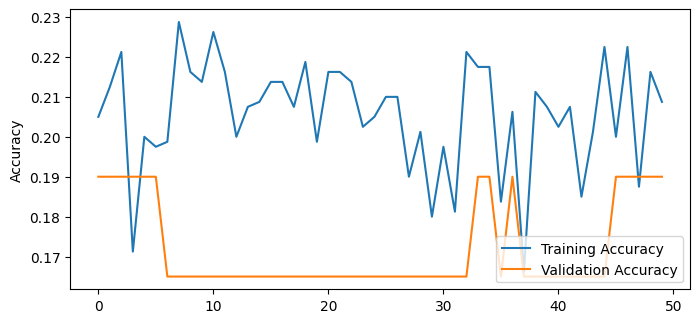

In [23]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
model.save('../modelh5/model_mfcc.h5')

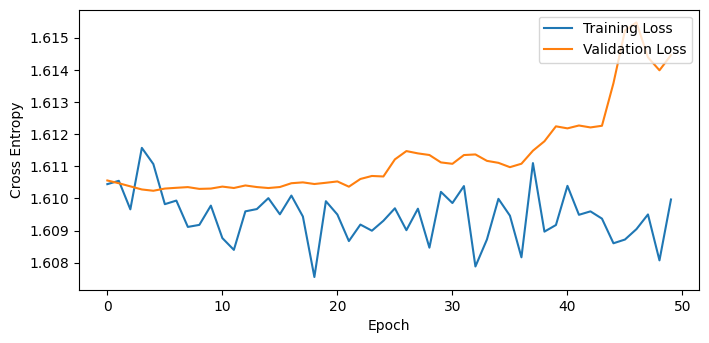

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()


In [25]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 1s 49ms/step


array([[ 0,  0, 48,  0,  0],
       [ 0,  0, 33,  0,  0],
       [ 0,  0, 38,  0,  0],
       [ 0,  0, 44,  0,  0],
       [ 0,  0, 37,  0,  0]])

In [26]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.00      0.00      0.00        33
           2       0.19      1.00      0.32        38
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        37

    accuracy                           0.19       200
   macro avg       0.04      0.20      0.06       200
weighted avg       0.04      0.19      0.06       200



/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Testing

In [27]:
model_uri = '../modelh5/model_mfcc.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 101, 64)           16896     
                                                                 
 dense (Dense)               (None, 101, 32)           2080      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                5

In [28]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    scaler = StandardScaler()
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


In [29]:
predict('../data/training/MS/New_MS_003.wav')

1/1 [==============================] - 1s 573ms/step
[0.19148074 0.20976369 0.21084198 0.19379728 0.19411625]
2
Predicted class: MS
